# Zestaw 3 - Interpolacja
## Autor: Jacek Nitychoruk

### Zadanie 1 - Interpolacja Lagrange'a
Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

In [59]:
function LagrangeCalculate(xs, ys, x)
    res = 0
    for k in 1:1:length(xs)
        comp = ys[k]
        for i in 1:1:length(xs)
            if i != k
               comp *= (x-xs[i])/(xs[k]-xs[i]) 
            end
        end
        res += comp
    end
    return res
end

LagrangeCalculate (generic function with 1 method)

#### Demonstracja działania
Przykład użycia funkcji dla 8 wylosowanych węzłów (losowane zarówno x i y) w przedziale od 1 do 50 z wartościami od 0 do 10: 

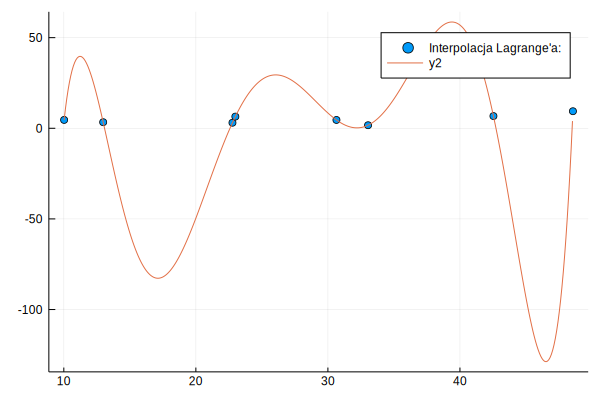

In [167]:
using Plots

points = 8

min_y=0
max_y=10

min_x=1
max_x=50

xs =  [rand()*(max_x-min_x)+min_x for x in 1:points]
ys = [rand()*(max_y-min_y)+min_y for x in xs]


xs2 = minimum(xs):0.1:maximum(xs)
ys2 = [LagrangeCalculate(xs, ys, x) for x in xs2]
    
scatter(xs, ys, label="Interpolacja Lagrange'a:")
plot!(xs2, ys2)

### Zadanie 2 - Interpolacja Newtona'a ( metoda ilorazów różnicowych)
Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych). Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ :
- napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
- napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie $x$.

In [118]:
function NewtonInterpolation(xs, ys)
    n = length(xs)
    diff = zeros(n,n)
    for i in 1:1:n
        diff[i,1] = ys[i] 
    end
    for k in 2:n
        for i in 1:n-k+1
            diff[i,k] = (diff[i+1,k-1] - diff[i,k-1]) / (xs[i+k-1] - xs[i])
        end
    end

    newt = zeros(n)
    for i in 1:1:n
        newt[i] = diff[1,i]
    end
    return newt
end

NewtonInterpolation (generic function with 1 method)

In [119]:
function NewtonCalculate(newt, xs, x)
    res = newt[1]
    for k in 2:1:length(newt)
        comp = newt[k]
        for i in 1:1:k-1
            comp *= (x-xs[i])
        end
        res += comp
    end
    return res
end


NewtonCalculate (generic function with 1 method)

#### Demonstracja działania
Przykład użycia funkcji dla 7 wylosowanych węzłów (losowane zarówno x i y) w przedziale od 1 do 50 z wartościami od 0 do 10: 

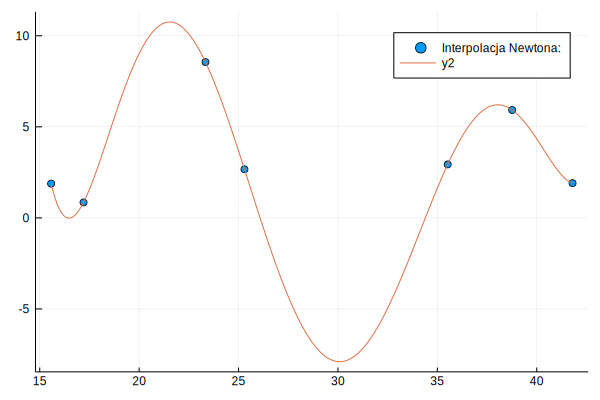

In [157]:
points_new = 7

min_y=0
max_y=10

min_x=1
max_x=50

xs_new =  [rand()*(max_x-min_x)+min_x for x in 1:points_new]
ys_new = [rand()*(max_y-min_y)+min_y for x in xs_new]


newt = NewtonInterpolation(xs_new, ys_new)

xs2_new = minimum(xs_new):0.1:maximum(xs_new)

ys2_new = [NewtonCalculate(newt, xs_new, x) for x in xs2_new]
    
scatter(xs_new, ys_new, label="Interpolacja Newtona:")
plot!(xs2_new, ys2_new)

### Zadanie 3 
Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

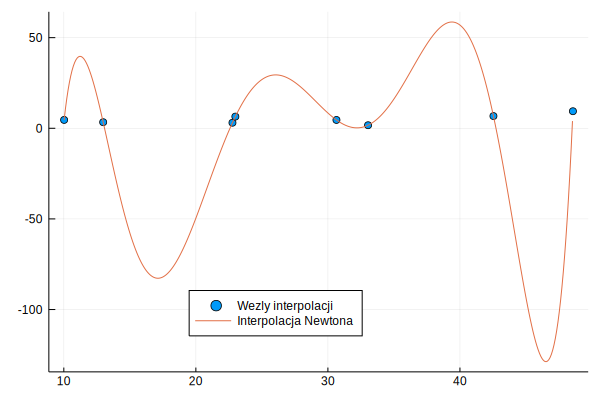

In [180]:
xs2_n = minimum(xs):0.1:maximum(xs)
newt = NewtonInterpolation(xs, ys)
ys2_n = [NewtonCalculate(newt, xs, x) for x in xs2_n]
    
scatter(xs, ys,  label="Wezly interpolacji", legend=:bottom)
plot!(xs2_n, ys2_n, label="Interpolacja Newtona")

### Zadanie 4 - Interpolacja wielomianowa z pakietu `Polynomials`
Zastosowac interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

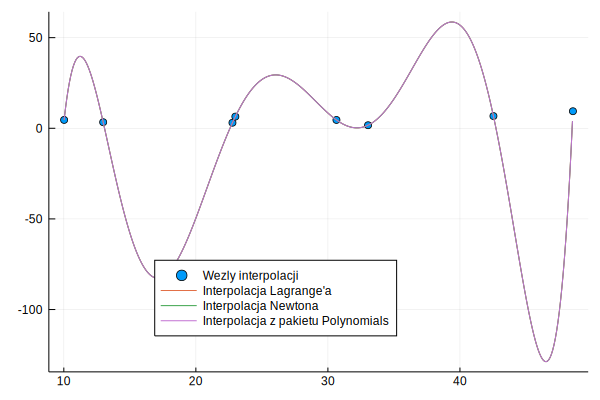

In [181]:
using Polynomials

xs2 = minimum(xs):0.1:maximum(xs)

ys2_l = [LagrangeCalculate(xs, ys, x) for x in xs2]
newt = NewtonInterpolation(xs, ys)
ys2_n = [NewtonCalculate(newt, xs, x) for x in xs2]
ys2_p = polyval(polyfit(xs, ys, length(xs)-1), xs2)

scatter(xs, ys,  label="Wezly interpolacji", legend=:bottom)
plot!(xs2, ys2_l, label="Interpolacja Lagrange'a")
plot!(xs2, ys2_n, label="Interpolacja Newtona")
plot!(xs2, ys2_p, label = "Interpolacja z pakietu Polynomials")

Wszystkie trzy wykresy są dokładnie takie same i nakładają się na siebie, przez co widoczny jest tylko jeden z nich. Jest to spowodowane faktem, że interpolacje Lagrange'a i Newtona są jednoznaczne i muszą prowadzić do tego samego wielomianu.

### Zadanie 5 - Pomiary czasu
Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego. Narzedzie do analizy danych do wyboru (Julia, R)

#### Komentarz 
Przeprowadziłem po 10 pomiarów czasu dla różnej ilości węzłów (do 10 do 150 ze skokiem co 5).Najszybsza okazała się funkcja biblioteczna, a najwolniejsza - implementacja interpolacji Lagrange'a. Interpolacja metody Newtona w bardzo krótkim czasie oblicza potrzebne ilorazy różnicowe, ale samo obliczenie wartości funkcji jest realizowane w czasie kwadratowym. Funkcja biblioteczna z kolei potrzebuje więcej czasu na obliczenie wielomianu, ale bardzo szybko oblicza wartości w punkcie i sumarycznie jest najszybszą z testowanych.

In [261]:
range = 10:5:150

nodes = []
lagrange = []
newton_calc = []
newton_values = []
polynomials_calc = []
polynomials_values = []


for i in range
    xs = 0:1:i
    ys = [rand() for x in xs]
    
    for j in 1:10
        push!(nodes, i)
        
        xs2 = 1:0.1:i
        
        # LAGRANGE TIME
        
        push!(lagrange, @elapsed [LagrangeCalculate(xs, ys, x) for x in xs2])
        
        # NEWTON TIME
        
        push!(newton_calc, @elapsed newt = NewtonInterpolation(xs, ys))
        push!(newton_values, @elapsed [NewtonCalculate(newt, xs, x) for x in xs2])
        
        # POLYNOMIALS TIME
        
        push!(polynomials_calc, @elapsed fit = polyfit(xs, ys, length(xs) - 1))
        push!(polynomials_values, @elapsed polyval(fit, xs2))
    end
end



In [262]:
using DataFrames
using Statistics

df=DataFrame()
df.nodes=nodes
df.lagrange = lagrange
df.newton_calc=newton_calc
df.newton_values=newton_values
df.polynomials_calc=polynomials_calc
df.polynomials_values=polynomials_values

gdf=by(df, :nodes, 
    avg_lagrange=:lagrange => mean,
    std_lagrange=:lagrange => std,
    
    avg_newton_calc=:newton_calc => mean,
    std_newton_calc=:newton_calc => std,
    
    avg_newton_values=:newton_values => mean,
    std_newton_values=:newton_values => std,
    
    avg_polynomials_calc=:polynomials_calc => mean,
    std_polynomials_calc=:polynomials_calc => std,
    
    avg_polynomials_values=:polynomials_values => mean,
    std_polynomials_values=:polynomials_values => std,
    )
gdf = gdf[gdf.nodes .> 10, :]

,nodes,avg_lagrange,std_lagrange,avg_newton_calc,std_newton_calc,avg_newton_values
,Any,Float64,Float64,Float64,Float64,Float64
1,15,0.00012088,7.74215e-7,1.9102e-6,5.38719e-7,4.95601e-5
2,20,0.00028349,1.99626e-5,4.0098e-6,6.26032e-7,0.00011059
3,25,0.00053279,1.96342e-5,5.2699e-6,1.07166e-6,0.0002106
4,30,0.00082107,5.20418e-5,5.7899e-6,9.38272e-7,0.00034441
5,35,0.00127716,0.000133376,7.26e-6,1.04047e-6,0.00048727
6,40,0.00163656,5.59434e-5,8.1e-6,4.26823e-7,0.00064753
7,45,0.00226986,7.34784e-5,1.33201e-5,3.87058e-6,0.00091903
8,50,0.00306151,7.97664e-5,2.24601e-5,1.67235e-6,0.00118758
9,55,0.00423443,0.000632385,2.39598e-5,4.28203e-6,0.0015109


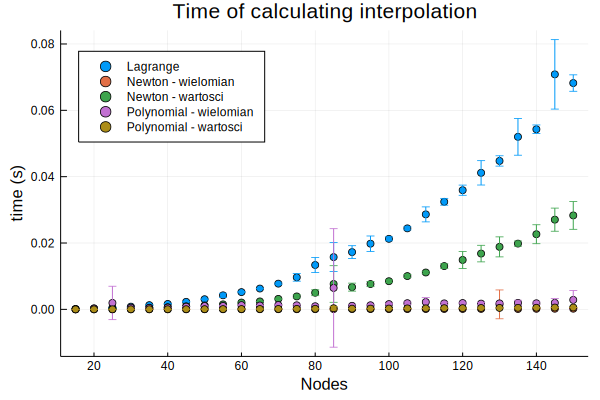

In [263]:
scatter(gdf.nodes,
    [gdf.avg_lagrange gdf.avg_newton_calc gdf.avg_newton_values gdf.avg_polynomials_calc gdf.avg_polynomials_values],
yerr=[gdf.std_lagrange gdf.std_newton_calc gdf.std_newton_values gdf.std_polynomials_calc gdf.std_polynomials_values],
    title = "Time of calculating interpolation",
    label=["Lagrange" "Newton - wielomian" "Newton - wartosci" "Polynomial - wielomian" "Polynomial - wartosci"],
    xlabel="Nodes",
    ylabel="time (s)", legend=:topleft)

### Zadanie 6 - Funkcje sklejane
Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej.

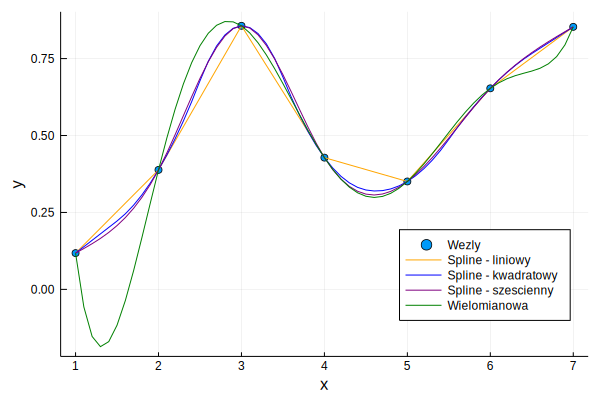

In [7]:
using Interpolations
using Polynomials
using Plots 

xs =  1:1:7
ys = [rand() for x in xs]

xs2 = 1:0.1:7

linear = LinearInterpolation(xs, ys)
linear_ys = [linear(x) for x in xs2]

quadratic = interpolate(ys, BSpline(Quadratic(Line(OnCell()))))
quadratic_ys = [quadratic(x) for x in xs2]

cubic = CubicSplineInterpolation(xs, ys)
cubic_ys = [cubic(x) for x in xs2]

fit = polyfit(xs, ys, length(xs) - 1)
polyfit_ys = polyval(fit, xs2)


scatter(xs, ys, label = "Wezly", legend=:bottomright)
plot!(xs2, linear_ys, label = "Spline - liniowy", color = "orange")
plot!(xs2, quadratic_ys, label = "Spline - kwadratowy", color = "blue")
plot!(xs2, cubic_ys, label = "Spline - szescienny", color = "purple")
plot!(xs2, polyfit_ys, label = "Wielomianowa", color = "green")
xlabel!("x")
ylabel!("y")

#### Komentarz
Interpolacja funkcją sklejaną kwadratową i sześcienną daje dość podobne rezultaty. Największe odchylenia występują w przypadku interpolacji wielomianowej, czego przyczyną jest występujący tam efekt Rungego.

### Zadanie 7
Zademonstrować  efekt Rungego.

#### Komentarz:
Już dla wielomianu o 20 węzłach interpolacji efekt Rungego jest prawie zawsze bardzo dobrze widoczny:

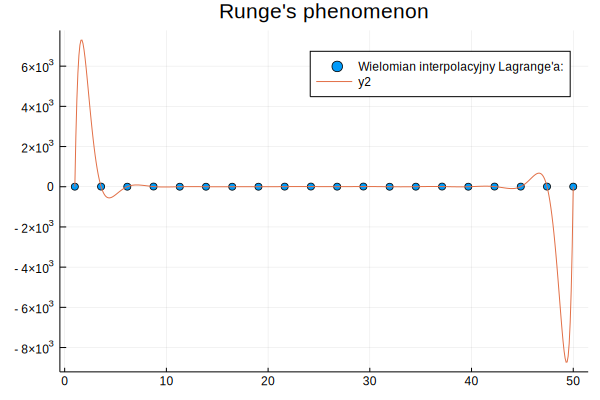

In [301]:
using Plots

points = 20

min_y=0
max_y=10

min_x=1
max_x=50

xs =  min_x:((max_x-min_x)/(points-1)):max_x
ys = [rand()*(max_y-min_y)+min_y for x in xs]


xs2 = minimum(xs):0.1:maximum(xs)
ys2 = [LagrangeCalculate(xs, ys, x) for x in xs2]
    
scatter(xs, ys, label="Wielomian interpolacyjny Lagrange'a:", title="Runge's phenomenon")
plot!(xs2, ys2)
